In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Load dataset
train_path = r"D:\major project\nepali-offensive-lang-detection-dataset\train.json"
test_path = r"D:\major project\nepali-offensive-lang-detection-dataset\test.json"

train_df = pd.read_json(train_path)
test_df = pd.read_json(test_path)


# Show basic structure
print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)
print("\nSample data train:\n")
train_df.head()






Train shape: (5798, 4)
Test shape: (1450, 4)

Sample data train:



,ID,Comment,Label_Binary,Label_Multiclass
0,vumtps,आज जीउदै छौ कसलाई के थाहा छ र भोली जीउदै भईन्छ...,NOFF,NO
1,zrqopi,अटल बीहारी अवीवाहीत थीए छोरी कहाँ बाट हून्छ भन...,OFF,OR
2,iizffd,जरुरि छ / नेपालको पोलिटिकल सिस्टम ले गर्दा तिम...,NOFF,NO
3,yadmpv,मान्छे मात्र होइन गाउँ तिर भैसी ब्याउने समय पन...,NOFF,NO
4,tggjjt,सरलार जनतालाइ देखाउन आफ्नो फोटो बीजूलीको पोलमा...,OFF,OO


In [2]:
print("\nSample data test:\n")
print(test_df.head())



Sample data test:

       ID                                            Comment Label_Binary  \
0  ncstjc  Sala khate chor fata daka gunda lutera yo sale...          OFF   
1  qzbidz  मेघ्ना नागरिता बिधेयक सर्बोच्च पठाएको र चिनबाट...          OFF   
2  cwwltf  सूरक्षाकर्मी कानूनको उलंघन भएमा उलंघनकर्तालाई ...         NOFF   
3  sbwhic                          DilerBrave jam la aau 😂😂😂         NOFF   
4  ymktcm  kina jhagara garnu hw ka sabai nepali nai ta h...         NOFF   

  Label_Multiclass  
0               OO  
1               OO  
2               NO  
3               NO  
4               NO  


In [7]:
# Check for nulls
print("\nMissing values:\n", train_df.isnull().sum())

# Create validation set (10–15% split from train set)
train_df, val_df = train_test_split(
    train_df, test_size=0.15, stratify=train_df["Label_Multiclass"], random_state=42
)

print(f"\nNew train size: {len(train_df)}, Validation size: {len(val_df)}, Test size: {len(test_df)}")


Missing values:
 ID                  0
Comment             0
Label_Binary        0
Label_Multiclass    0
dtype: int64

New train size: 4928, Validation size: 870, Test size: 1450



Train Label_Multiclass Distribution:
 Label_Multiclass
NO    3028
OO    1657
OR     185
OS      58
Name: count, dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_5244\4280155401.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette="pastel")


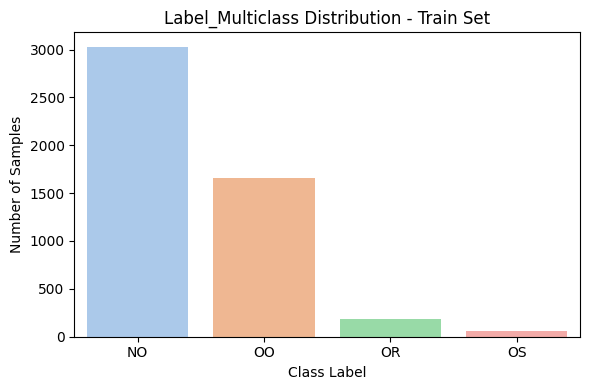


Validation Label_Multiclass Distribution:
 Label_Multiclass
NO    534
OO    293
OR     33
OS     10
Name: count, dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_5244\4280155401.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette="pastel")


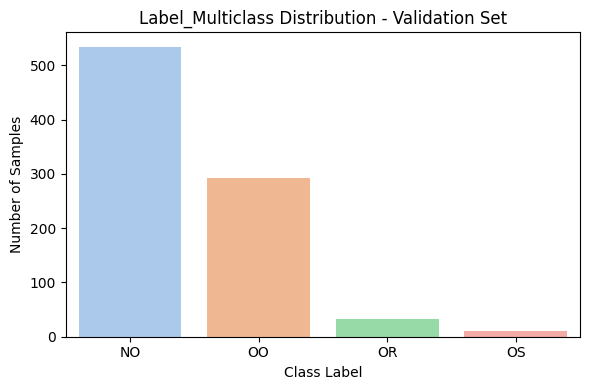


Test Label_Multiclass Distribution:
 Label_Multiclass
NO    896
OO    486
OR     49
OS     19
Name: count, dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_5244\4280155401.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette="pastel")


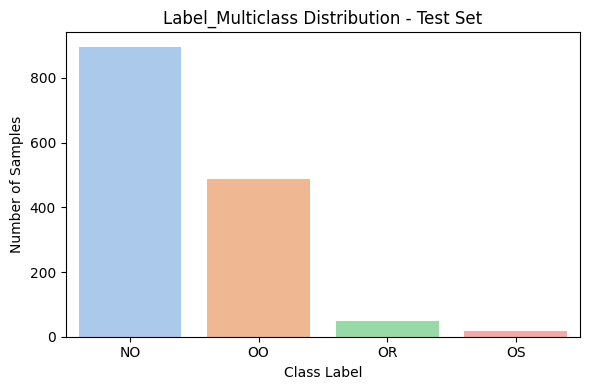


Train Set - Text Length Statistics (in words):
count    4928.000000
mean       17.243506
std        15.329702
min         1.000000
25%         7.000000
50%        13.000000
75%        24.000000
max       172.000000
Name: text_length, dtype: float64


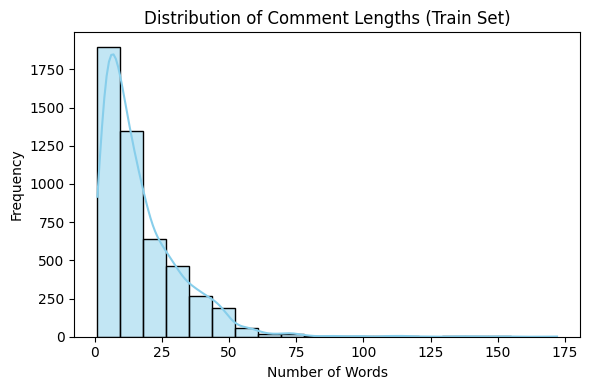


Validation Set - Text Length Statistics (in words):
count    870.000000
mean      17.489655
std       14.775474
min        1.000000
25%        7.000000
50%       13.000000
75%       24.000000
max      112.000000
Name: text_length, dtype: float64


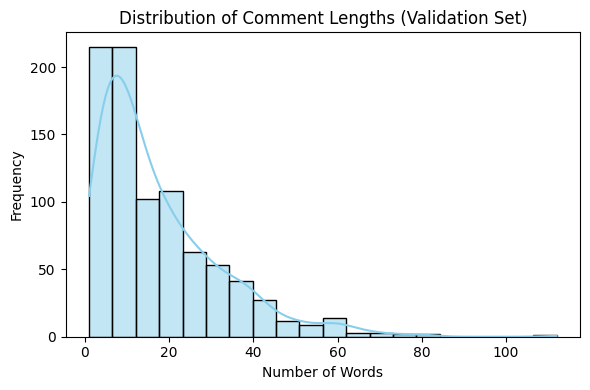


Test Set - Text Length Statistics (in words):
count    1450.000000
mean       17.044138
std        16.056000
min         1.000000
25%         6.000000
50%        12.000000
75%        23.000000
max       231.000000
Name: text_length, dtype: float64


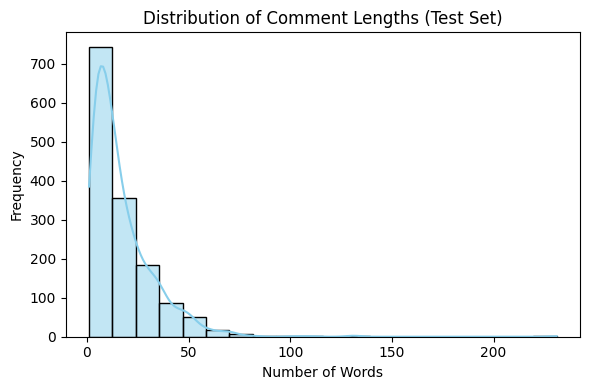

In [8]:
# ------------------------------
# Class Distribution Analysis
# ------------------------------

def plot_label_distribution(df, label_col, dataset_name):
    label_counts = df[label_col].value_counts().sort_index()
    print(f"\n{dataset_name} {label_col} Distribution:\n", label_counts)

    plt.figure(figsize=(6, 4))
    sns.barplot(x=label_counts.index, y=label_counts.values, palette="pastel")
    plt.title(f"{label_col} Distribution - {dataset_name} Set")
    plt.xlabel("Class Label")
    plt.ylabel("Number of Samples")
    plt.tight_layout()
    plt.show()

# Plot for train/val/test multiclass
plot_label_distribution(train_df, "Label_Multiclass", "Train")
plot_label_distribution(val_df, "Label_Multiclass", "Validation")
plot_label_distribution(test_df, "Label_Multiclass", "Test")

# ------------------------------
# Text Length Analysis
# ------------------------------
for df, name in [(train_df, "Train"), (val_df, "Validation"), (test_df, "Test")]:
    df["text_length"] = df["Comment"].apply(lambda x: len(str(x).split()))
    print(f"\n{name} Set - Text Length Statistics (in words):")
    print(df["text_length"].describe())

    plt.figure(figsize=(6, 4))
    sns.histplot(df["text_length"], bins=20, kde=True, color="skyblue")
    plt.title(f"Distribution of Comment Lengths ({name} Set)")
    plt.xlabel("Number of Words")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()


#### Text Length Statistics:
The average comment length is approximately 20–25 words, with most comments ranging from 5 to 40 words. This information is critical for choosing input sequence lengths when training deep learning or transformer-based models to avoid truncation or excessive padding.

#### Data Quality:
No missing values were detected in the ID, Comment, or label columns. The comments include emojis, informal phrasing, and variations in spelling, which suggests that robust preprocessing (normalization, stopword removal, etc.) will be essential to achieve good performance.